In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
import pandas as pd
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns

**Loading  Dataset**

In [3]:
df = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#to display no of samples of each class
df['species'].value_counts()


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

**DATA PREPROCESSING**


In [7]:
#check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

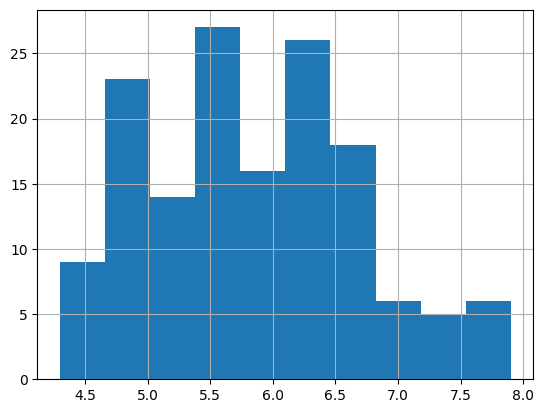

In [8]:
df['sepal_length'].hist()

<Axes: >

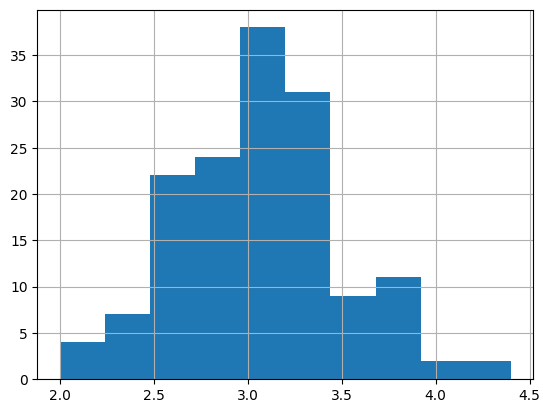

In [9]:
df['sepal_width'].hist()

<Axes: >

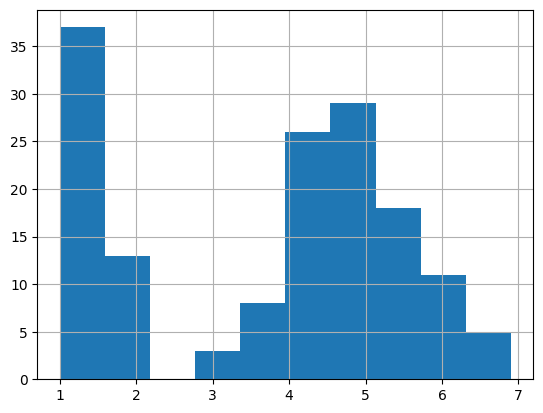

In [10]:
df['petal_length'].hist()

<Axes: >

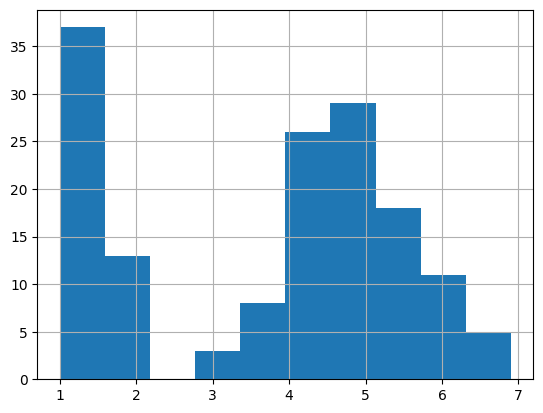

In [11]:
df['petal_length'].hist()

**SCATTER PLOT**

In [12]:
#scatter plot
colors=['red','blue','yellow']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']


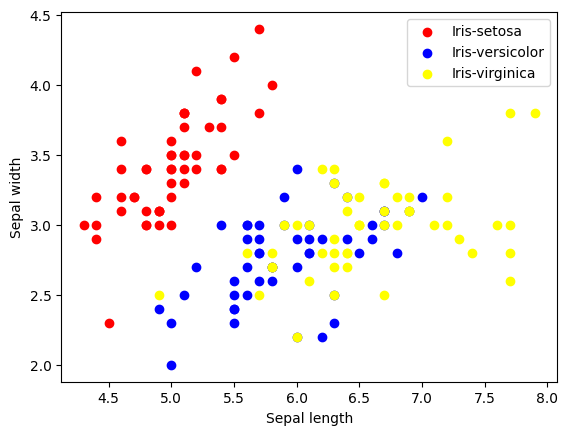

In [13]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'], c=colors[i], label=species[i])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()    

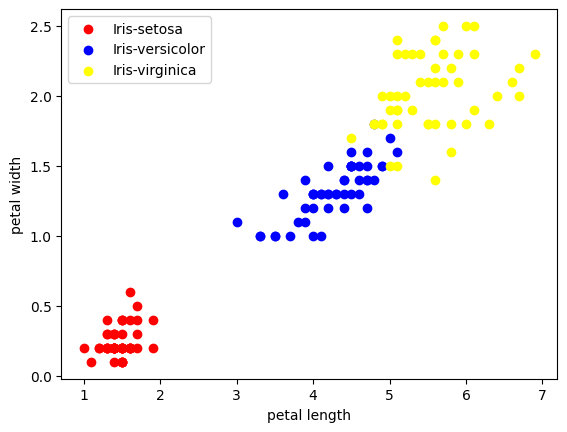

In [14]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'], c=colors[i], label=species[i])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

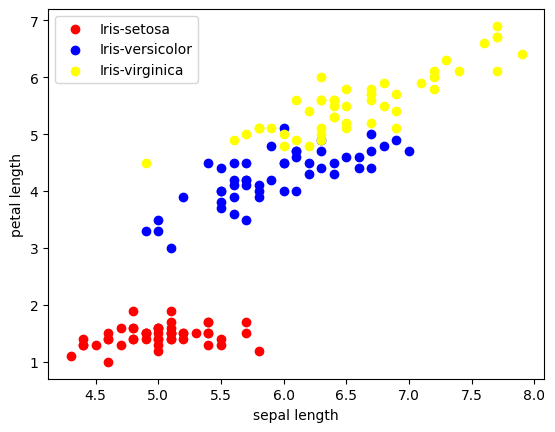

In [15]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'], c=colors[i], label=species[i])
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

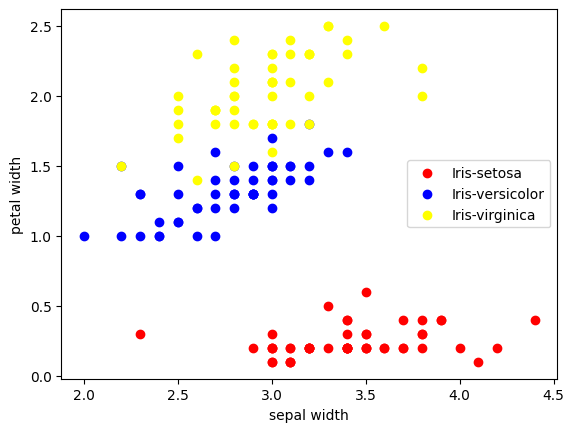

In [16]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'], c=colors[i], label=species[i])
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.legend()

**CORRELATION MATRIX**


In [17]:
df_new= df.drop(columns=['species'])
df_new.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


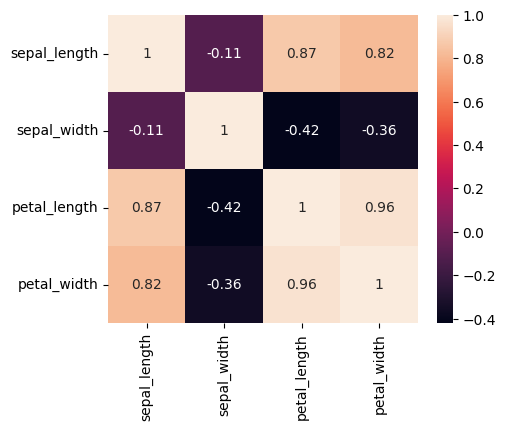

In [18]:
corr = df_new.corr()
fig, ax = plt.subplots(figsize=(5, 4))  # Corrected order of arguments
sns.heatmap(corr, annot=True, ax=ax)
plt.show()


**Label Encoder**

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['species'])
y=df['species']
x_train,x_test ,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [22]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression ()

model.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
print("Accuracy :", model.score(x_test, y_test)*100)

Accuracy : 96.66666666666667


In [24]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [25]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
print("Acurracy :", model.score(x_test,y_test)*100)

Acurracy : 90.0
